In [1]:
from garmin_fit_sdk import Decoder, Stream
import pandas as pd
import datetime

In [2]:
FIT_FILE_LOCATION = "/Users/kuba/Desktop/playground/garmin-test/2025-03-14-11-10-44.fit"
FILE_NAME = 'test_recording'
CSV_SAVE_LOCATION = f"~/Desktop/{FILE_NAME}.csv"

In [3]:
stream = Stream.from_file(FIT_FILE_LOCATION)
decoder = Decoder(stream)
messages, errors = decoder.read()

In [4]:
print('errors: ',errors)

errors:  []


In [5]:
print('We have ',len(messages['accelerometer_data_mesgs']),' groups of data')
print('Each group has ',len(messages['accelerometer_data_mesgs'][1]['calibrated_accel_x']),'sampled points')
print('In total we have',len(messages['accelerometer_data_mesgs']) * len(messages['accelerometer_data_mesgs'][1]['calibrated_accel_x']),'sampled points in the whole fit file')

We have  104  groups of data
Each group has  25 sampled points
In total we have 2600 sampled points in the whole fit file


In [6]:
#create the dataframeß
df = pd.DataFrame(columns=['timestamp', 'x', 'y', 'z'])

In [7]:
# add a group to the dataframe
def add_to_df(df, x, y, z, timestamp, timestamp_ms, sample_time_offset):
    if not (len(x) == len(y) == len(z) == len(sample_time_offset)):
        raise ValueError("All input lists must have the same length")
    
    precise_base_timestamp = timestamp.replace(microsecond=timestamp_ms*1000)
    
    start_idx = len(df)
    
    for i in range(len(x)):
        sample_timestamp = precise_base_timestamp + datetime.timedelta(milliseconds=sample_time_offset[i])
        df.loc[start_idx + i] = [sample_timestamp, x[i],y[i],z[i]]
    
    return df

In [8]:
# iterate over all groups to add to the df
for group in range(len(messages['accelerometer_data_mesgs'])):
    df = add_to_df(df, messages['accelerometer_data_mesgs'][group]['calibrated_accel_x'], messages['accelerometer_data_mesgs'][group]['calibrated_accel_y'], messages['accelerometer_data_mesgs'][group]['calibrated_accel_z'],
          messages['accelerometer_data_mesgs'][group]['timestamp'], messages['accelerometer_data_mesgs'][group]['timestamp_ms'], messages['accelerometer_data_mesgs'][group]['sample_time_offset'])

In [9]:
df

,timestamp,x,y,z
0,2025-03-14 15:10:43.125000+00:00,-37.816780,-178.484589,-957.471802
1,2025-03-14 15:10:43.134000+00:00,-56.335300,-157.085892,-959.422668
2,2025-03-14 15:10:43.153000+00:00,-66.081886,-143.468536,-935.037109
3,2025-03-14 15:10:43.162000+00:00,-76.803139,-147.359207,-915.528748
4,2025-03-14 15:10:43.172000+00:00,-42.690075,-156.113220,-913.577942
...,...,...,...,...
2595,2025-03-14 15:11:09.078000+00:00,-17.348946,15.076355,-1013.070801
2596,2025-03-14 15:11:09.088000+00:00,23.586727,123.042511,-1015.997070
2597,2025-03-14 15:11:09.098000+00:00,1.169573,141.523193,-1018.923279
2598,2025-03-14 15:11:09.107000+00:00,-4.678380,132.769196,-1076.473022


Lets take a look at it

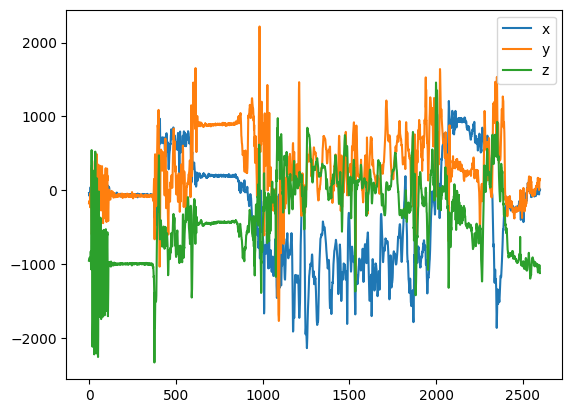

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['x'], label='x')
plt.plot(df['y'], label='y')
plt.plot(df['z'], label='z')
plt.legend()
plt.show()


Now lests save it

In [11]:
df.to_csv(CSV_SAVE_LOCATION, index=False)